In [1]:
from qiskit import circuit, pulse, transpile, schedule, quantum_info as qi
from qiskit.test.mock import FakeBogota

In [2]:
backend = FakeBogota()

circ = circuit.QuantumCircuit(2)
su4 = qi.random_unitary(4, seed=123).to_instruction()
circ.compose(su4, [0, 1], inplace=True)
circ.measure_all()

circ.draw()

┌──────────┐ ░ ┌─┐   
   q_0: ┤0         ├─░─┤M├───
        │  Unitary │ ░ └╥┘┌─┐
   q_1: ┤1         ├─░──╫─┤M├
        └──────────┘ ░  ║ └╥┘
meas: 2/════════════════╩══╩═
                        0  1

In [3]:
%%timeit
schedule(transpile(circ, backend), backend)

39.7 ms ± 3.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
sched = schedule(transpile(circ, backend), backend)

CPU times: user 11min 32s, sys: 1.08 s, total: 11min 33s
Wall time: 11min 35s


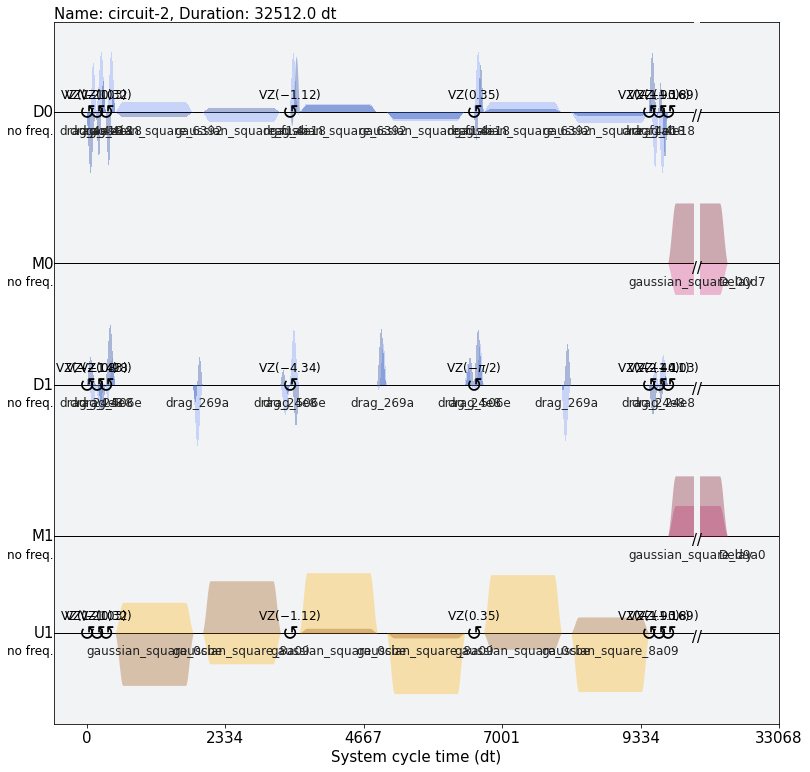

In [10]:
%%time
sched.draw()

CPU times: user 6.44 s, sys: 31.3 ms, total: 6.47 s
Wall time: 6.47 s


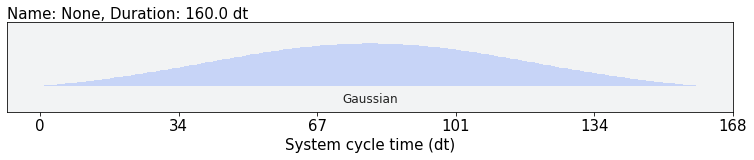

In [6]:
%%time
gaussian = pulse.Gaussian(160, 0.1, 40)
gaussian.draw()

CPU times: user 365 ms, sys: 7.13 ms, total: 372 ms
Wall time: 352 ms


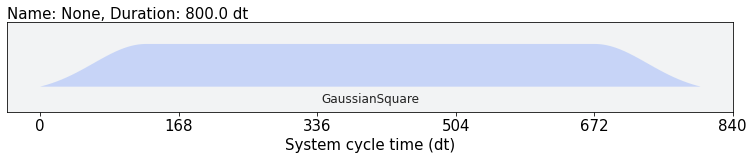

In [7]:
%%time
gaussian_sq = pulse.GaussianSquare(800, 0.1, 64, risefall_sigma_ratio=2)
gaussian_sq.draw()

CPU times: user 9.23 s, sys: 30.5 ms, total: 9.26 s
Wall time: 9.25 s


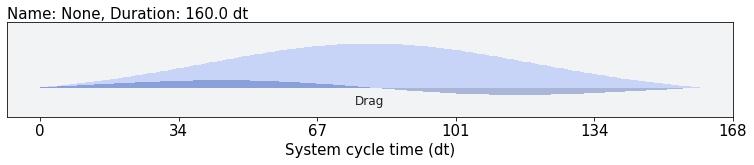

In [8]:
%%time
drag = pulse.Drag(160, 0.1, 40, 0.3)
drag.draw()

CPU times: user 244 ms, sys: 21.6 ms, total: 266 ms
Wall time: 142 ms


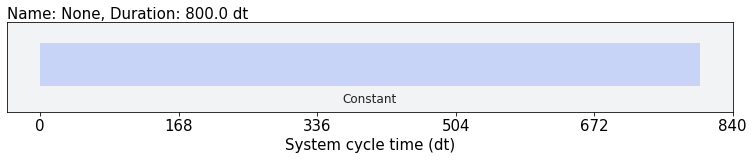

In [9]:
%%time
constant = pulse.Constant(800, 0.1)
constant.draw()